In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.style.use('ggplot')
%matplotlib inline

data = pd.read_csv('Parking_Violations.csv', parse_dates=['Issue Date'])

/usr/lib64/python2.7/site-packages/pandas/io/parsers.py:1159: DtypeWarning: Columns (18,29,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [2]:
data.columns

Index([u'﻿Summons Number', u'Plate ID', u'Registration State', u'Plate Type', u'Issue Date', u'Violation Code', u'Vehicle Body Type', u'Vehicle Make', u'Issuing Agency', u'Street Code1', u'Street Code2', u'Street Code3', u'Vehicle Expiration Date', u'Violation Location', u'Violation Precinct', u'Issuer Precinct', u'Issuer Code', u'Issuer Command', u'Issuer Squad', u'Violation Time', u'Time First Observed', u'Violation County', u'Violation In Front Of Or Opposite', u'House Number', u'Street Name', u'Intersecting Street', u'Date First Observed', u'Law Section', u'Sub Division', u'Violation Legal Code', u'Days Parking In Effect    ', u'From Hours In Effect', u'To Hours In Effect', u'Vehicle Color', u'Unregistered Vehicle?', u'Vehicle Year', u'Meter Number', u'Feet From Curb', u'Violation Post Code', u'Violation Description', u'No Standing or Stopping Violation', u'Hydrant Violation', u'Double Parking Violation'], dtype='object')

In [3]:
data.head()

,﻿Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1361929741,FCJ5493,NY,PAS,12/18/1970,20,SUBN,GMC,S,35030,...,BLACK,0,2013,-,0,NaN,NaN,NaN,NaN,NaN
1,1366962000,63540MC,NY,COM,02/02/1971,46,DELV,FRUEH,P,58830,...,BRN,0,2013,-,0,NaN,NaN,NaN,NaN,NaN
2,1356906515,GFM1421,NY,PAS,09/18/1971,40,SDN,MAZDA,X,13610,...,BLK,0,2010,-,7,NaN,NaN,NaN,NaN,NaN
3,1342296217,FYM5117,NY,SRF,09/18/1971,21,SUBN,NISSA,S,28190,...,WHITE,0,2012,-,0,NaN,NaN,NaN,NaN,NaN
4,1342296199,95V6675,TX,PAS,09/18/1971,21,NaN,GMC,S,11790,...,SILVR,0,2008,-,0,NaN,NaN,NaN,NaN,NaN


# By states

In [4]:
# total
data.groupby('Registration State').size().order(ascending=False).head(10)

Registration State
NY                    7029804
NJ                     878677
PA                     225760
CT                     136973
FL                     111887
MA                      78650
VA                      60951
MD                      50407
IN                      49126
NC                      47117
dtype: int64

In [5]:
# percentage
temp = data.groupby('Registration State').size().apply(lambda x: 100*x/float(data.shape[0])).order(ascending=False).head(10)
temp

Registration State
NY                    77.248234
NJ                     9.655496
PA                     2.480803
CT                     1.505152
FL                     1.229490
MA                     0.864259
VA                     0.669771
MD                     0.553906
IN                     0.539830
NC                     0.517753
dtype: float64

In [6]:
# numbers from http://www.rita.dot.gov/bts/sites/rita.dot.gov.bts/files/publications/state_transportation_statistics_85/index.html
byStates = {'NY':10400000/2536000, 'NJ':7900000/2536000, 'PA':10500000/2536000, 'CT':2700000/2536000, 'FL':15700000/2536000, 'MA':4900000/2536000, 'VA':7100000/2536000, 'MD':4000000/2536000, 'IN':6000000/2536000, 'NC':7800000/2536000}
states = ['NY', 'NJ', 'PA', 'CT', 'FL', 'MA', 'VA', 'MD', 'IN', 'NC']
for state in states:
    print('%s\t%f' % (state, byStates[state]))

NY	4.000000
NJ	3.000000
PA	4.000000
CT	1.000000
FL	6.000000
MA	1.000000
VA	2.000000
MD	1.000000
IN	2.000000
NC	3.000000


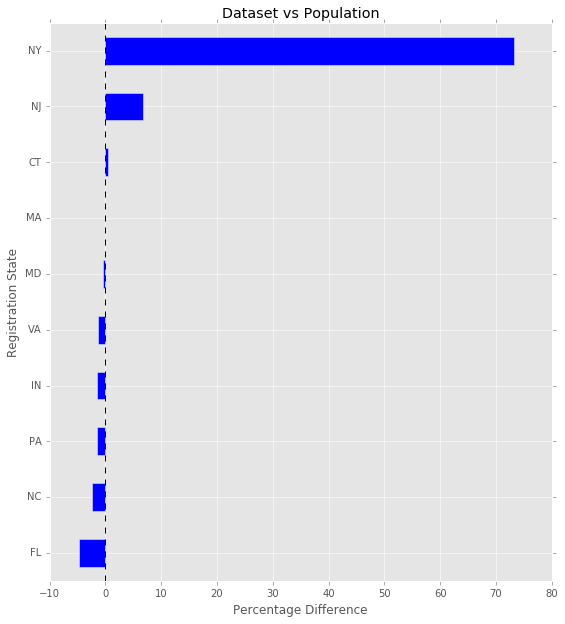

In [7]:
temp2 = pd.Series(byStates)
diff = temp - temp2
diff.order().plot(kind='barh', figsize=[9, 10])
plt.title('Dataset vs Population')
plt.ylabel('Registration State')
plt.xlabel('Percentage Difference')

# By colors

In [32]:
# some data cleaning
color = data.index[data['Vehicle Color'] == 'WH']
data.loc[color, 'Vehicle Color'] = 'WHITE'
color = data.index[data['Vehicle Color'] == 'WHT']
data.loc[color, 'Vehicle Color'] = 'WHITE'
color = data.index[data['Vehicle Color'] == 'WT']
data.loc[color, 'Vehicle Color'] = 'WHITE'

color = data.index[data['Vehicle Color'] == 'GY']
data.loc[color, 'Vehicle Color'] = 'GRAY'
color = data.index[data['Vehicle Color'] == 'GREY']
data.loc[color, 'Vehicle Color'] = 'GRAY'
color = data.index[data['Vehicle Color'] == 'GRY']
data.loc[color, 'Vehicle Color'] = 'GRAY'

color = data.index[data['Vehicle Color'] == 'BK']
data.loc[color, 'Vehicle Color'] = 'BLACK'
color = data.index[data['Vehicle Color'] == 'BLK']
data.loc[color, 'Vehicle Color'] = 'BLACK'

color = data.index[data['Vehicle Color'] == 'BL']
data.loc[color, 'Vehicle Color'] = 'BLUE'
color = data.index[data['Vehicle Color'] == 'BLU']
data.loc[color, 'Vehicle Color'] = 'BLUE'

color = data.index[data['Vehicle Color'] == 'SILVE']
data.loc[color, 'Vehicle Color'] = 'SILVER'
color = data.index[data['Vehicle Color'] == 'SL']
data.loc[color, 'Vehicle Color'] = 'SILVER'
color = data.index[data['Vehicle Color'] == 'SIL']
data.loc[color, 'Vehicle Color'] = 'SILVER'

color = data.index[data['Vehicle Color'] == 'RD']
data.loc[color, 'Vehicle Color'] = 'RED'

color = data.index[data['Vehicle Color'] == 'GR']
data.loc[color, 'Vehicle Color'] = 'GREEN'
color = data.index[data['Vehicle Color'] == 'GRN']
data.loc[color, 'Vehicle Color'] = 'GREEN'

color = data.index[data['Vehicle Color'] == 'BR']
data.loc[color, 'Vehicle Color'] = 'BROWN'
color = data.index[data['Vehicle Color'] == 'BRN']
data.loc[color, 'Vehicle Color'] = 'BROWN'
color = data.index[data['Vehicle Color'] == 'BRWN']
data.loc[color, 'Vehicle Color'] = 'BROWN'
color = data.index[data['Vehicle Color'] == 'BRO']
data.loc[color, 'Vehicle Color'] = 'BROWN'
color = data.index[data['Vehicle Color'] == 'BROW']
data.loc[color, 'Vehicle Color'] = 'BROWN'
color = data.index[data['Vehicle Color'] == 'BRW']
data.loc[color, 'Vehicle Color'] = 'BROWN'
color = data.index[data['Vehicle Color'] == 'BWN']
data.loc[color, 'Vehicle Color'] = 'BROWN'
color = data.index[data['Vehicle Color'] == 'BN']
data.loc[color, 'Vehicle Color'] = 'BROWN'
color = data.index[data['Vehicle Color'] == 'BRNW']
data.loc[color, 'Vehicle Color'] = 'BROWN'

color = data.index[data['Vehicle Color'] == 'YW']
data.loc[color, 'Vehicle Color'] = 'YELLOW'
color = data.index[data['Vehicle Color'] == 'YELLO']
data.loc[color, 'Vehicle Color'] = 'YELLOW'

color = data.index[data['Vehicle Color'] == 'TN']
data.loc[color, 'Vehicle Color'] = 'TAN'

color = data.index[data['Vehicle Color'] == 'GL']
data.loc[color, 'Vehicle Color'] = 'GOLD'

color = data.index[data['Vehicle Color'] == 'OR']
data.loc[color, 'Vehicle Color'] = 'ORANGE'
color = data.index[data['Vehicle Color'] == 'ORANG']
data.loc[color, 'Vehicle Color'] = 'ORANGE'

color = data.index[data['Vehicle Color'] == 'PURPL']
data.loc[color, 'Vehicle Color'] = 'PURPLE'

In [9]:
# total
data.groupby('Vehicle Color').size().order(ascending=False).head(10)

Vehicle Color
WHITE            2595463
GRAY             1721538
BLACK            1676038
BLUE              750669
RED               538051
GREEN             359944
BROWN             355121
SILVER            327105
TAN               203212
YELLOW            113885
dtype: int64

In [10]:
# percentage
temp = data.groupby('Vehicle Color').size().apply(lambda x: 100*x/float(data.shape[0])).order(ascending=False).head(10)
temp

Vehicle Color
WHITE            28.520700
GRAY             18.917422
BLACK            18.417437
BLUE              8.248858
RED               5.912468
GREEN             3.955308
BROWN             3.902309
SILVER            3.594451
TAN               2.233031
YELLOW            1.251445
dtype: float64

In [11]:
# numbers from http://www.axaltacs.com/content/dam/New%20Axalta%20Corporate%20Website/Documents/Publications/Axalta2013_Global_Color_Popularity_Report.pdf
byColors = {'WHITE':26, 'GRAY':13, 'BLACK':20, 'BLUE':7, 'RED':9, 'GREEN':2, 'BROWN':5, 'SILVER':14, 'TAN':0.4, 'YELLOW':2}
colors = ['WHITE', 'GRAY', 'BLACK', 'BLUE', 'RED', 'GREEN', 'BROWN', 'SILVER', 'TAN', 'YELLOW']
for color in colors:
    print('%s\t%f' % (color, byColors[color]))

WHITE	26.000000
GRAY	13.000000
BLACK	20.000000
BLUE	7.000000
RED	9.000000
GREEN	2.000000
BROWN	5.000000
SILVER	14.000000
TAN	0.400000
YELLOW	2.000000


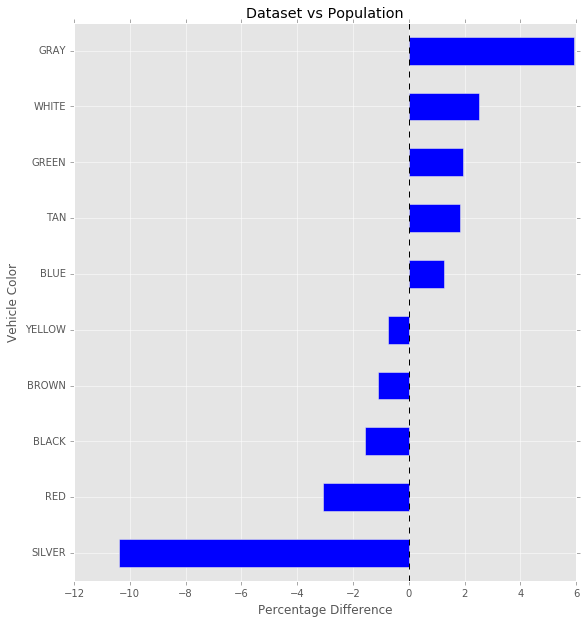

In [12]:
temp2 = pd.Series(byColors)
diff = temp - temp2
diff.order().plot(kind='barh', figsize=[9, 10])
plt.title('Dataset vs Population')
plt.ylabel('Vehicle Color')
plt.xlabel('Percentage Difference')

# By make

In [13]:
# some data cleaning
make = data.index[data['Vehicle Make'] == 'TOYOT']
data.loc[make, 'Vehicle Make'] = 'TOYOTA'

make = data.index[data['Vehicle Make'] == 'CHEVR']
data.loc[make, 'Vehicle Make'] = 'CHEVROLET'

make = data.index[data['Vehicle Make'] == 'NISSA']
data.loc[make, 'Vehicle Make'] = 'NISSAN'

make = data.index[data['Vehicle Make'] == 'ME/BE']
data.loc[make, 'Vehicle Make'] = 'MERCEDES-BENZ'

make = data.index[data['Vehicle Make'] == 'HYUND']
data.loc[make, 'Vehicle Make'] = 'HYUNDAI'

make = data.index[data['Vehicle Make'] == 'VOLKS']
data.loc[make, 'Vehicle Make'] = 'VOLKSWAGEN'

make = data.index[data['Vehicle Make'] == 'CHRYS']
data.loc[make, 'Vehicle Make'] = 'CHRYSLER'

make = data.index[data['Vehicle Make'] == 'LINCO']
data.loc[make, 'Vehicle Make'] = 'LINCOLN'

make = data.index[data['Vehicle Make'] == 'MITSU']
data.loc[make, 'Vehicle Make'] = 'MITSUBISHI'

make = data.index[data['Vehicle Make'] == 'INFIN']
data.loc[make, 'Vehicle Make'] = 'INFINITY'

make = data.index[data['Vehicle Make'] == 'MERCU']
data.loc[make, 'Vehicle Make'] = 'MERCURY'

make = data.index[data['Vehicle Make'] == 'SUBAR']
data.loc[make, 'Vehicle Make'] = 'SUBARU'

make = data.index[data['Vehicle Make'] == 'CADIL']
data.loc[make, 'Vehicle Make'] = 'CADILLAC'

make = data.index[data['Vehicle Make'] == 'FRUEH']
data.loc[make, 'Vehicle Make'] = 'FRUEHAUF'

In [14]:
# total
data.groupby('Vehicle Make').size().order(ascending=False).head(10)

Vehicle Make
FORD             1248622
TOYOTA            878786
HONDA             810460
CHEVROLET         743556
NISSAN            655276
DODGE             316499
GMC               313671
MERCEDES-BENZ     299845
FRUEHAUF          289634
INTER             277444
dtype: int64

In [15]:
# percentage
temp = data.groupby('Vehicle Make').size().apply(lambda x: 100*x/float(data.shape[0])).order(ascending=False).head(10)
temp

Vehicle Make
FORD             13.720702
TOYOTA            9.656694
HONDA             8.905882
CHEVROLET         8.170695
NISSAN            7.200615
DODGE             3.477905
GMC               3.446829
MERCEDES-BENZ     3.294899
FRUEHAUF          3.182694
INTER             3.048742
dtype: float64

In [16]:
# numbers from http://www.goodcarbadcar.net/2015/08/july-2015-usa-auto-sales-figures-by-brand-make.html
byMake = {'FORD':14.5, 'TOYOTA':12.3, 'HONDA':7.9, 'CHEVROLET':12.4, 'NISSAN':7.9, 'DODGE':2.9, 'GMC':3.1, 'MERCEDES-BENZ':2.1, 'FRUEHAUF':3.182694, 'INTER':3.048742}
makes = ['FORD', 'TOYOTA', 'HONDA', 'CHEVROLET', 'NISSAN', 'DODGE', 'GMC', 'MERCEDES-BENZ', 'FRUEHAUF', 'INTER']
for make in makes:
    print('%s\t%f' % (make, byMake[make]))

FORD	14.500000
TOYOTA	12.300000
HONDA	7.900000
CHEVROLET	12.400000
NISSAN	7.900000
DODGE	2.900000
GMC	3.100000
MERCEDES-BENZ	2.100000
FRUEHAUF	3.182694
INTER	3.048742


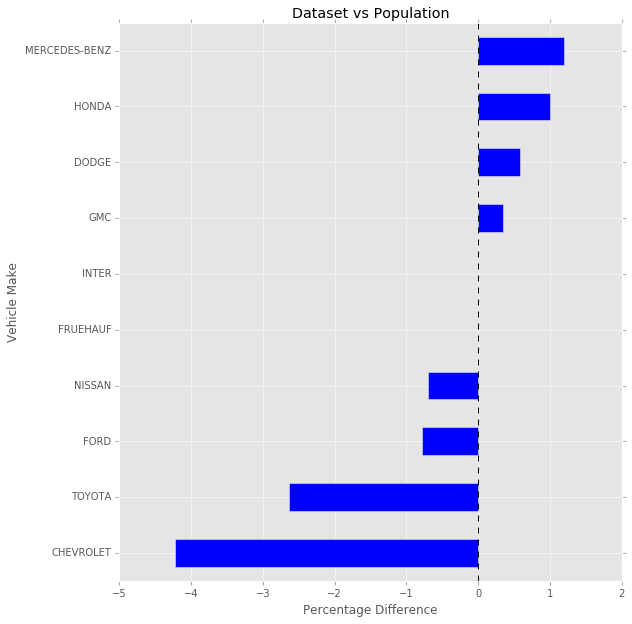

In [17]:
temp2 = pd.Series(byMake)
diff = temp - temp2
diff.order().plot(kind='barh', figsize=[9, 10])
plt.title('Dataset vs Population')
plt.ylabel('Vehicle Make')
plt.xlabel('Percentage Difference')

# By type

In [15]:
# some data cleaning
bodytype = data.index[data['Vehicle Body Type'] == 'SUBN']
data.loc[bodytype, 'Vehicle Body Type'] = 'SUV'
bodytype = data.index[data['Vehicle Body Type'] == 'UTIL']
data.loc[bodytype, 'Vehicle Body Type'] = 'SUV'

bodytype = data.index[data['Vehicle Body Type'] == '4DSD']
data.loc[bodytype, 'Vehicle Body Type'] = 'SEDAN'
bodytype = data.index[data['Vehicle Body Type'] == '2DSD']
data.loc[bodytype, 'Vehicle Body Type'] = 'SEDAN'
bodytype = data.index[data['Vehicle Body Type'] == 'SDN']
data.loc[bodytype, 'Vehicle Body Type'] = 'SEDAN'
bodytype = data.index[data['Vehicle Body Type'] == '4 DR']
data.loc[bodytype, 'Vehicle Body Type'] = 'SEDAN'

bodytype = data.index[data['Vehicle Body Type'] == 'PICK']
data.loc[bodytype, 'Vehicle Body Type'] = 'PICKUP'
bodytype = data.index[data['Vehicle Body Type'] == 'P-U']
data.loc[bodytype, 'Vehicle Body Type'] = 'PICKUP'

bodytype = data.index[data['Vehicle Body Type'] == 'DELV']
data.loc[bodytype, 'Vehicle Body Type'] = 'DELIVERY/TRUCK/TRAILER'
bodytype = data.index[data['Vehicle Body Type'] == 'DELI']
data.loc[bodytype, 'Vehicle Body Type'] = 'DELIVERY/TRUCK/TRAILER'
bodytype = data.index[data['Vehicle Body Type'] == 'REFG']
data.loc[bodytype, 'Vehicle Body Type'] = 'DELIVERY/TRUCK/TRAILER'
bodytype = data.index[data['Vehicle Body Type'] == 'TRAC']
data.loc[bodytype, 'Vehicle Body Type'] = 'DELIVERY/TRUCK/TRAILER'
bodytype = data.index[data['Vehicle Body Type'] == 'TRUC']
data.loc[bodytype, 'Vehicle Body Type'] = 'DELIVERY/TRUCK/TRAILER'
bodytype = data.index[data['Vehicle Body Type'] == 'TRLR']
data.loc[bodytype, 'Vehicle Body Type'] = 'DELIVERY/TRUCK/TRAILER'
bodytype = data.index[data['Vehicle Body Type'] == 'FLAT']
data.loc[bodytype, 'Vehicle Body Type'] = 'DELIVERY/TRUCK/TRAILER'

bodytype = data.index[data['Vehicle Body Type'] == 'CONV']
data.loc[bodytype, 'Vehicle Body Type'] = 'CONVERTIBLE'

bodytype = data.index[data['Vehicle Body Type'] == 'MCY']
data.loc[bodytype, 'Vehicle Body Type'] = 'MOTORCYCLE'

bodytype = data.index[data['Vehicle Body Type'] == 'WAGO']
data.loc[bodytype, 'Vehicle Body Type'] = 'STATION WAGON'

In [19]:
# total
data.groupby('Vehicle Body Type').size().order(ascending=False).head(10)

Vehicle Body Type
SEDAN                     3231219
SUV                       2876737
VAN                       1384393
DELIVERY/TRUCK/TRAILER     926666
PICKUP                     250156
TAXI                        50946
BUS                         43382
CONVERTIBLE                 41714
MOTORCYCLE                  28976
STATION WAGON               11936
dtype: int64

In [20]:
# percentage
temp = data.groupby('Vehicle Body Type').size().apply(lambda x: 100*x/float(data.shape[0])).order(ascending=False).head(10)
temp

Vehicle Body Type
SEDAN                     35.506816
SUV                       31.611529
VAN                       15.212645
DELIVERY/TRUCK/TRAILER    10.182832
PICKUP                     2.748883
TAXI                       0.559829
BUS                        0.476711
CONVERTIBLE                0.458382
MOTORCYCLE                 0.318408
STATION WAGON              0.131161
dtype: float64

In [21]:
# numbers from http://www.autocareweek.com/wp-content/uploads/2014/07/IHS_SUV_CUV_Share_Chart_071614.pdf
# http://www.nyc.gov/html/tlc/downloads/pdf/2014_taxicab_fact_book.pdf
# http://web.mta.info/nyct/facts/ffbus.htm
# http://www.truckinfo.net/trucking/stats.htm
# http://www.statista.com/statistics/191002/number-of-registered-motorcycles-in-the-us-by-state/
byBodyType = {'SEDAN':35.4, 'SUV':36.5, 'VAN':3.6, 'DELIVERY/TRUCK/TRAILER':0.7, 'PICKUP':13.1, 'TAXI':0.14, 'BUS':0.05, 'CONVERTIBLE':1.0, 'MOTORCYCLE':3.5, 'STATION WAGON': 1.2}
styles = ['SEDAN', 'SUV', 'VAN', 'DELIVERY/TRUCK/TRAILER', 'PICKUP', 'TAXI', 'BUS', 'CONVERTIBLE', 'MOTORCYCLE', 'STATION WAGON']
for style in styles:
    print('%s\t%f' % (style, byBodyType[style]))

SEDAN	35.400000
SUV	36.500000
VAN	3.600000
DELIVERY/TRUCK/TRAILER	0.700000
PICKUP	13.100000
TAXI	0.140000
BUS	0.050000
CONVERTIBLE	1.000000
MOTORCYCLE	3.500000
STATION WAGON	1.200000


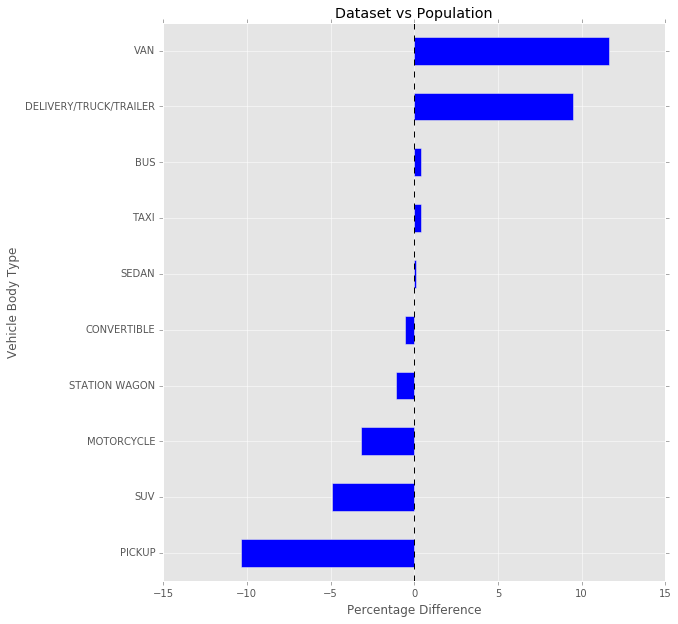

In [22]:
temp2 = pd.Series(byBodyType)
diff = temp - temp2
diff.order().plot(kind='barh', figsize=[9, 10])
plt.title('Dataset vs Population')
plt.ylabel('Vehicle Body Type')
plt.xlabel('Percentage Difference')

# By violation code

In [23]:
# total
data.groupby('Violation Code').size().order(ascending=False).head(10)

Violation Code
38                1243479
21                1239596
14                 851694
37                 738577
20                 545172
71                 519168
46                 462321
40                 455484
7                  433213
19                 287481
dtype: int64

In [24]:
# percentage
temp = data.groupby('Violation Code').size().apply(lambda x: 100*x/float(data.shape[0])).order(ascending=False).head(10)
temp

Violation Code
38                13.664187
21                13.621518
14                 9.358989
37                 8.115983
20                 5.990718
71                 5.704969
46                 5.080295
40                 5.005166
7                  4.760437
19                 3.159035
dtype: float64

Violation codes (from http://www1.nyc.gov/site/finance/vehicles/services-violation-codes.page)

**38** Muni Meter - Failing to show a receipt or tag in the windshield

**21** Street Cleaning: No parking where parking is not allowed by sign, street marking or traffic control device

**14** General No Standing: Standing or parking where standing is not allowed by sign, street marking or; traffic control device

**37** Muni Meter - Parking in excess of the allowed time

**20** General No Parking: No parking where parking is not allowed by sign, street marking or traffic control device

**71** Standing or parking a vehicle without showing a current inspection sticker

**46** Standing or parking on the roadway side of a vehicle stopped, standing or parked at the curb; in other words also known as "double parking"

**40** Stopping, standing or parking closer than 15 feet of a fire hydrant

**7** Vehicles photographed going through a red light at an intersection

**19** Bus Stop: Standing or parking where standing is not allowed by sign, street marking or; traffic control device

# By time

In [25]:
nan = float('nan')

def formatTime(value):
    try:
        hour = int(value[:2])
        minute = int(value[2:4])
        period = value[4]
        if hour > 12 or minute > 60 or not(period == 'A' or period == 'P'):
            return nan
        if period == 'P' and hour < 12:
            hour += 12
        if period == 'A' and hour == 12:
            hour = 0
        return hour
    except TypeError:
        return nan
    except ValueError:
        return nan
    except IndexError:
        return nan

data['hours'] = data['Violation Time'].apply(formatTime)

In [26]:
data.groupby('hours').size()

hours
0        102963
1         95548
2         84591
3         65540
4         28035
5         62490
6        182578
7        441086
8        820606
9        939181
10       727181
11       888923
12       718738
13       873310
14       773083
15       562577
16       552314
17       401972
18       259532
19        77312
20       135581
21       132396
22        96487
23        75931
dtype: int64

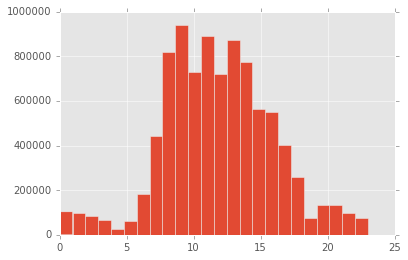

In [27]:
data.hours.hist(bins=24)

# Vehicle Year

In [69]:
def formatYear(value):
    if value < 2014 and value > 1900:
        return value
    else:
        return nan

data['years'] = data['Vehicle Year'].apply(formatYear)

In [70]:
data.groupby('years').size().order(ascending=False)

years
2013     784427
2012     647424
2011     511126
2007     482137
2006     417380
2008     405123
2005     397236
2010     380297
2004     359990
2003     329742
2009     319685
2002     302565
2001     265094
1999     184449
1998     143733
1997     128593
1995      84712
1996      83098
1994      42900
1988      29401
1993      28926
1990      27185
1992      21511
1989      16358
1987      15248
1991      10887
1986       8181
1985       4086
1984       1685
1983       1104
1982        944
1980        673
1979        631
1981        586
1978        463
1977        452
1973        343
1971        314
1976        309
1970        285
1972        276
1975        252
1974        207
dtype: int64

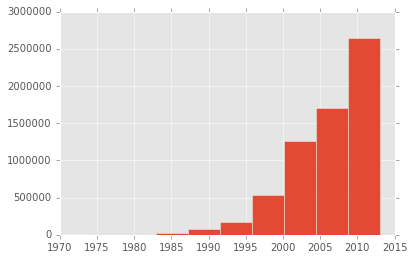

In [71]:
data.years.hist(bins=10)

# Frequent Itemsets

In [107]:
subset = data[['Registration State', 'Vehicle Color', 'Vehicle Make', 'Vehicle Body Type', 'hours', 'years', 'Violation Code']].copy()

def replaceNaN(value):
    if np.isnan(value):
        return '?'
    else:
        return value

def replaceOther(known):
    def replacer(value):
        if not value in known:
            return '.'
        else:
            return value
    return replacer

subset['hours'] = subset['hours'].apply(replaceNaN)
subset['years'] = subset['years'].apply(replaceNaN)

known_states = ['AL','AK','AS','AZ','AR','CA','CO','CT','DE','DC','FL','GA','GU','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MH','MA','MI','FM','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','MP','OH','OK','OR','PW','PA','PR','RI','SC','SD','TN','TX','UT','VT','VA','VI','WA','WV','WI','WY']
subset['Registration State'] = subset['Registration State'].apply(replaceOther(known_states))

known_colors = ['WHITE','GRAY','BLACK','BLUE','SILVER','RED','GREEN','BROWN','YELLOW','TAN','GOLD','ORANGE','PURPLE']
subset['Vehicle Color'] = subset['Vehicle Color'].apply(replaceOther(known_colors))

known_makes = ['TOYOTA','CHEVROLET','NISSAN','MERCEDES-BENZ','HYUNDAI','VOLKSWAGEN','CHRYSLER','LINCOLN','MITSUBISHI','INFINITY','MERCURY','SUBARU','CADILLAC','FRUEHAUF']
subset['Vehicle Make'] = subset['Vehicle Make'].apply(replaceOther(known_makes))

known_types = ['SUV','SEDAN','PICKUP','DELIVERY/TRUCK/TRAILER','CONVERTIBLE','MOTORCYCLE','STATION WAGON']
subset['Vehicle Body Type'] = subset['Vehicle Body Type'].apply(replaceOther(known_types))

In [108]:
import Orange
from Orange.feature import Discrete, Continuous
from Orange.data import Domain, Table

domain = Domain([
    Discrete('Registration State', values=[str(v) for v in np.unique(subset['Registration State'])]),
    Discrete('Vehicle Color', values=[str(v) for v in np.unique(subset['Vehicle Color'])]),
    Discrete('Vehicle Make', values=[str(v) for v in np.unique(subset['Vehicle Make'])]),
    Discrete('Vehicle Body Type', values=[str(v) for v in np.unique(subset['Vehicle Body Type'])]),
    Discrete('hours', values=[str(v).replace('.0', '') for v in np.unique(subset['hours'])]),
    Discrete('years', values=[str(v).replace('.0', '') for v in np.unique(subset['years'])]),
    Discrete('Violation Code', values=[str(v) for v in np.unique(subset['Violation Code'])])], True)
table = Table(domain, [map(lambda value: str(value).replace('.0', ''), row) for row in subset.as_matrix()])

In [103]:
rules = Orange.associate.AssociationRulesInducer(table, support=0.1, confidence=0.1, max_item_sets=100000000)
print('%8s %8s  %s' % ('Supp', 'Conf', 'Rule'))
for r in rules:
    print('%f %f  %s' % (r.support, r.confidence, r))

    Supp     Conf  Rule
0.142054 0.771302  Vehicle Color=BLACK -> Registration State=NY
0.142054 0.183893  Registration State=NY -> Vehicle Color=BLACK
0.158428 0.837473  Vehicle Color=GRAY -> Registration State=NY
0.158428 0.205090  Registration State=NY -> Vehicle Color=GRAY
0.215446 0.755401  Vehicle Color=WHITE -> Registration State=NY
0.215446 0.278901  Registration State=NY -> Vehicle Color=WHITE
0.425425 0.766950  Vehicle Make=. -> Registration State=NY
0.425425 0.550725  Registration State=NY -> Vehicle Make=.
0.156337 0.821011  Vehicle Body Type=. -> Registration State=NY
0.156337 0.202382  Registration State=NY -> Vehicle Body Type=.
0.270097 0.760692  Vehicle Body Type=SEDAN -> Registration State=NY
0.270097 0.349649  Registration State=NY -> Vehicle Body Type=SEDAN
0.258329 0.817200  Vehicle Body Type=SUV -> Registration State=NY
0.258329 0.334415  Registration State=NY -> Vehicle Body Type=SUV
0.101329 0.743888  Violation Code=21 -> Registration State=NY
0.101329 0.131173 

In [110]:
rules = Orange.associate.AssociationRulesInducer(table, support=0.01, confidence=0.10, classification_rules=True)
print('%8s %8s  %s' % ('Supp', 'Conf', 'Rule'))
for r in rules:
    print('%f %f  %s' % (r.support, r.confidence, r))

    Supp     Conf  Rule
0.015423 0.168161  Registration State=NJ years=? -> Violation Code=14
0.012079 0.131699  Registration State=NJ years=? -> Violation Code=38
0.015485 0.160371  Registration State=NJ -> Violation Code=14
0.012082 0.125127  Registration State=NJ -> Violation Code=38
0.010945 0.159359  Registration State=NY Vehicle Color=BLACK Vehicle Make=. -> Violation Code=21
0.011836 0.170701  Registration State=NY Vehicle Color=BLACK Vehicle Body Type=SEDAN -> Violation Code=21
0.022228 0.156473  Registration State=NY Vehicle Color=BLACK -> Violation Code=21
0.019727 0.138867  Registration State=NY Vehicle Color=BLACK -> Violation Code=38
0.010578 0.160739  Registration State=NY Vehicle Color=BLUE -> Violation Code=21
0.012418 0.161414  Registration State=NY Vehicle Color=GRAY Vehicle Make=. -> Violation Code=21
0.010607 0.137878  Registration State=NY Vehicle Color=GRAY Vehicle Make=. -> Violation Code=38
0.014232 0.181570  Registration State=NY Vehicle Color=GRAY Vehicle Body

# Plate ID

In [27]:
# total
data.groupby(['Plate ID', 'Registration State']).size().order(ascending=False).head(11)

Plate ID    Registration State
BLANKPLATE  99                    12809
49839JG     NY                     1382
62901JM     NY                     1096
92979JE     NY                      989
49781MA     NY                      973
75225JW     NY                      971
63485JM     NY                      966
47603MD     NY                      935
16208TC     NY                      934
62627JM     NY                      927
68092JZ     NY                      910
dtype: int64

In [30]:
data[(data['Plate ID'] == '49839JG') & (data['Registration State'] == 'NY')]

,﻿Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
1159,1357949364,49839JG,NY,COM,07/25/2012,46,VAN,MERCU,P,36270,...,BROWN,0,2002,-,0,NaN,NaN,NaN,NaN,NaN
1204,1359819186,49839JG,NY,COM,08/09/2012,46,DELV,MERCU,P,36270,...,BROWN,0,2002,-,0,NaN,NaN,NaN,NaN,NaN
2679,1366437597,49839JG,NY,COM,01/16/2013,19,VAN,NaN,P,36270,...,BURN,0,2002,-,0,NaN,NaN,NaN,NaN,NaN
3097,1366437500,49839JG,NY,COM,01/28/2013,46,VAN,MERCU,P,36270,...,BR,0,2002,-,0,NaN,NaN,NaN,NaN,NaN
12191,1350221077,49839JG,NY,COM,07/11/2013,46,DELV,MERCU,P,36270,...,NaN,0,0,-,0,NaN,NaN,NaN,NaN,NaN
16741,1354818568,49839JG,NY,COM,07/16/2013,46,VAN,INTER,P,36270,...,BROWN,0,2002,-,0,NaN,NaN,NaN,NaN,NaN
16859,1357949005,49839JG,NY,COM,07/16/2013,46,VAN,INTER,P,36270,...,BROWN,0,2002,-,0,NaN,NaN,NaN,NaN,NaN
16868,1357951607,49839JG,NY,COM,07/16/2013,46,VAN,INTER,P,36270,...,BROWN,0,2002,-,0,NaN,NaN,NaN,NaN,NaN
19277,1357951735,49839JG,NY,PAS,07/17/2013,19,VAN,INTER,P,36270,...,BR,0,2002,-,0,NaN,NaN,NaN,NaN,NaN
19336,1357952235,49839JG,NY,COM,07/17/2013,46,DELV,NaN,P,0,...,BRWN,0,2002,-,0,NaN,NaN,NaN,NaN,NaN


In [60]:
# total passenger
data[(data['Plate Type'] == 'PAS') & (data['Vehicle Body Type'] != 'DELIVERY/TRUCK/TRAILER') & (data['Vehicle Body Type'] != 'VAN') & (data['Vehicle Body Type'] != 'SUV')].groupby(['Plate ID', 'Registration State']).size().order(ascending=False).head(10)

Plate ID  Registration State
FWN7157   NY                    254
FXC2469   NY                    214
GKJ5051   NY                    205
1254460   IL                    182
FFR1794   NY                    166
XP308J    NJ                    163
XT308U    NJ                    161
ZFN20F    NJ                    159
FXR1439   NY                    152
N/S       NY                    148
dtype: int64

In [65]:
data[(data['Plate ID'] == 'FWN7157')]

,﻿Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
1319,1350812950,FWN7157,NY,PAS,09/22/2012,83,SEDAN,MAZDA,P,0,...,BLACK,0,2012,-,0,NaN,NaN,NaN,NaN,NaN
20116,1350798836,FWN7157,NY,PAS,07/17/2013,50,SEDAN,MAZDA,P,0,...,BLACK,0,2012,-,0,NaN,NaN,NaN,NaN,NaN
27577,1355202139,FWN7157,NY,PAS,07/19/2013,50,SEDAN,MAZDA,P,0,...,BLACK,0,2012,-,0,NaN,NaN,NaN,NaN,NaN
30821,1350799907,FWN7157,NY,PAS,07/20/2013,67,SEDAN,MAZDA,P,35730,...,BLACK,0,2012,-,0,NaN,NaN,NaN,NaN,NaN
30822,1350799919,FWN7157,NY,PAS,07/20/2013,50,SEDAN,MAZDA,P,35730,...,BLACK,0,2012,-,0,NaN,NaN,NaN,NaN,NaN
30823,1350799920,FWN7157,NY,PAS,07/20/2013,46,SEDAN,MAZDA,P,35730,...,BLACK,0,2012,-,0,NaN,NaN,NaN,NaN,NaN
30824,1350799932,FWN7157,NY,PAS,07/20/2013,9,SEDAN,MAZDA,P,35730,...,BLACK,0,2012,-,0,NaN,NaN,NaN,NaN,NaN
96615,1356635829,FWN7157,NY,PAS,07/29/2013,67,SEDAN,MAZDA,P,0,...,BLACK,0,2012,-,0,NaN,NaN,NaN,NaN,NaN
100709,7089455865,FWN7157,NY,PAS,07/29/2013,38,SEDAN,MAZDA,T,5580,...,BLACK,NaN,2012,NaN,0,58 -,38-Failure to Display Muni Rec,NaN,NaN,NaN
131110,1356636044,FWN7157,NY,PAS,07/30/2013,50,SEDAN,MAZDA,P,0,...,BLUE,0,2012,-,0,NaN,NaN,NaN,NaN,NaN


In [68]:
data[(data['Plate ID'] == 'FWN7157')].groupby('Violation Code').size().order(ascending=False)

Violation Code
38                163
67                 26
50                 26
21                 15
37                 10
70                  6
46                  2
83                  1
74                  1
36                  1
20                  1
14                  1
9                   1
dtype: int64

# UPS

In [48]:
data[(data['Vehicle Color'] == 'BROWN') & ((data['Vehicle Body Type'] == 'DELIVERY/TRUCK/TRAILER') | (data['Vehicle Body Type'] == 'VAN')) & (data['Plate Type'] == 'COM')].shape

(281688, 43)

# By Borough

In [30]:
# some data cleaning
county = data.index[data['Violation County'] == 'NY']
data.loc[county, 'Violation County'] = 'MANHATTAN'
county = data.index[data['Violation County'] == 'NYC']
data.loc[county, 'Violation County'] = 'MANHATTAN'
county = data.index[data['Violation County'] == 'K']
data.loc[county, 'Violation County'] = 'BROOKLYN'
county = data.index[data['Violation County'] == 'KINGS']
data.loc[county, 'Violation County'] = 'BROOKLYN'
county = data.index[data['Violation County'] == 'Q']
data.loc[county, 'Violation County'] = 'QUEENS'
county = data.index[data['Violation County'] == 'QUEEN']
data.loc[county, 'Violation County'] = 'QUEENS'
county = data.index[data['Violation County'] == '103']
data.loc[county, 'Violation County'] = 'QUEENS'
county = data.index[data['Violation County'] == 'BX']
data.loc[county, 'Violation County'] = 'BRONX'
county = data.index[data['Violation County'] == 'R']
data.loc[county, 'Violation County'] = 'STATEN ISLAND'
county = data.index[data['Violation County'] == 'RICH']
data.loc[county, 'Violation County'] = 'STATEN ISLAND'
county = data.index[data['Violation County'] == 'RC']
data.loc[county, 'Violation County'] = 'STATEN ISLAND'

In [33]:
# total
data.groupby('Violation County').size().order(ascending=False)

Violation County
MANHATTAN           3547198
BROOKLYN            1979049
QUEENS              1825978
BRONX                943552
STATEN ISLAND         99296
dtype: int64

In [34]:
# percentage
temp = data.groupby('Violation County').size().apply(lambda x: 100*x/float(data.shape[0])).order(ascending=False).head(10)
temp

Violation County
MANHATTAN           38.979007
BROOKLYN            21.747127
QUEENS              20.065079
BRONX               10.368387
STATEN ISLAND        1.091132
dtype: float64

In [40]:
# numbers from https://en.wikipedia.org/wiki/Borough_(New_York_City)
byCounties = {'MANHATTAN':163626800.0/8491079,'BRONX':143815900.0/8491079,'BROOKLYN':262179300.0/8491079,'QUEENS':232158000.0/8491079,'STATEN ISLAND':47327900.0/8491079}
counties = ['MANHATTAN','BROOKLYN','QUEENS','BRONX','STATEN ISLAND']
for county in counties:
    print('%s\t%f' % (county, byCounties[county]))

MANHATTAN	19.270437
BROOKLYN	30.877030
QUEENS	27.341401
BRONX	16.937294
STATEN ISLAND	5.573838


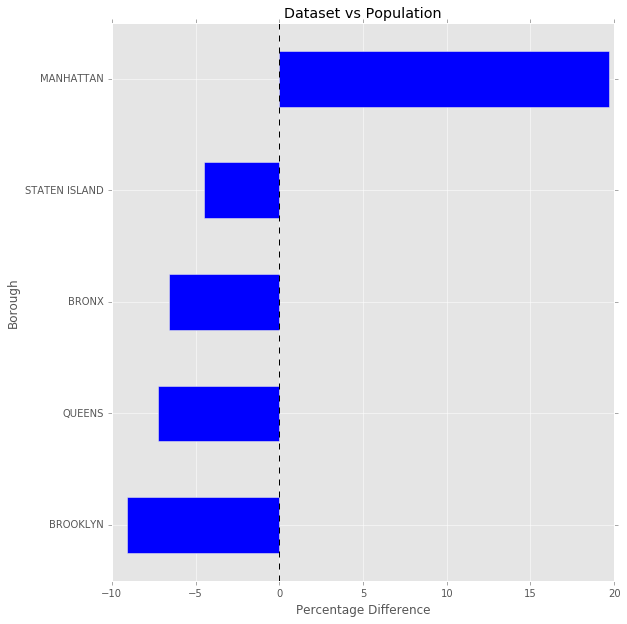

In [41]:
temp2 = pd.Series(byCounties)
diff = temp - temp2
diff.order().plot(kind='barh', figsize=[9, 10])
plt.title('Dataset vs Population')
plt.ylabel('Borough')
plt.xlabel('Percentage Difference')

# By Issuer

In [53]:
data.groupby('Issuer Code').size().order(ascending=False).head(11)

Issuer Code
0              659696
355542          16770
357092          13631
345534          13586
352979          12853
355598          12245
346124          12142
347489          12094
347615          11713
346199          11670
346400          11218
dtype: int64

In [ ]:
# where top 10 issuers work:
#2 brooklyn
#3 queens
#4 brooklyn
#5 brooklyn
#6 bronx
#7 brooklyn
#8 manhattan
#9 brooklyn
#10 brooklyn
#11 bronx

# Day of week

In [16]:
data['day_of_week'] = data['Issue Date'].apply(lambda x: x.date().weekday())

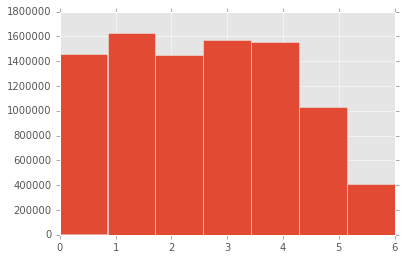

In [17]:
data.day_of_week.hist(bins=7)

In [19]:
ts = data.set_index(['Issue Date'])
data_2013_2014 = ts.ix['2013-07-01':'2014-06-30']
days = data_2013_2014.groupby(data_2013_2014.index).size()
days.to_csv('days.csv')

In [12]:
from ggplot import *
days = pd.read_csv('days.csv', parse_dates=['date'])

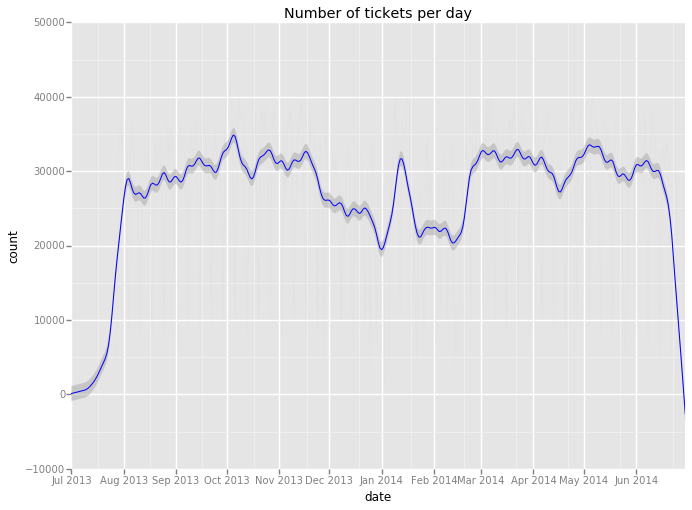

<ggplot: (8775802276201)>

In [32]:
ggplot(aes(x='date', y='count'), data=days) + geom_line(alpha=0.01) + stat_smooth(span=0.05, colour='blue') + ggtitle('Number of tickets per day')

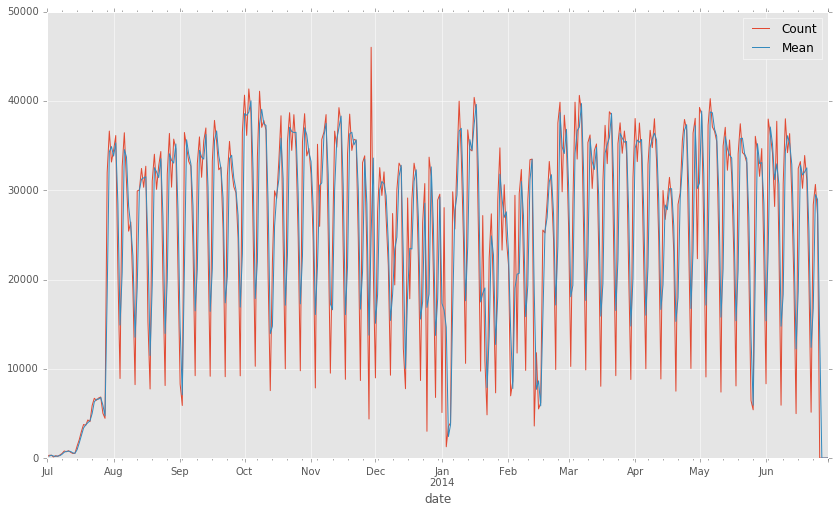

In [13]:
days = days.set_index(['date'])
mean = pd.rolling_mean(days['count'], 2)
plt.figure(figsize=(14,8))
days['count'].plot(label='Count')
mean.plot(label='Mean')
plt.legend()
plt.show()

# Violation code by body type

In [16]:
data[data['Vehicle Body Type'] == 'BUS'].groupby('Violation Code').size().order(ascending=False).head(10)

Violation Code
77                16798
14                 8162
19                 2647
7                  1760
20                 1627
38                 1542
31                 1523
46                 1063
21                 1037
40                  925
dtype: int64

In [17]:
data[data['Vehicle Body Type'] == 'TAXI'].groupby('Violation Code').size().order(ascending=False).head(10)

Violation Code
7                 8800
13                6692
14                5143
5                 4337
21                3742
38                3452
20                2700
46                2496
40                2133
31                2054
dtype: int64